In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [4]:
def plot_seasonal_time_series(data, season, year, var):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]
    
    if var == "Temp":
        frame = frame[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp", "date", "Month"]]
    elif var == "Prec":
        frame = frame[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec", "date", "Month"]]

    fig, axs = plt.subplots(3, 3, figsize = (40,10), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()

    frame_cols = frame.columns

    for i in range(len(frame_cols)):
        if i == 9:
            break
        else:
            frame[frame_cols[i]].groupby(frame["Month"]).plot(ax = axs[i])
            axs[i].set_title(frame_cols[i])

    plt.show()

def plot_seasonal_scatterplot(data, season, year):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]

    fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()


    for i in range(9):
        if i == 9:
            break
        else:
            frame.groupby(frame["Month"]).plot.scatter(prec[i], temp[i], ax = axs[i])

    plt.show()

In [5]:
test = pd.read_csv("final_db.csv")
test

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
0,1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1958,1,4,Winter
1,1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,...,3.3,3.7,0.7,3.1,4.2,1.1,1958,1,5,Winter
2,1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,...,12.5,11.2,12.2,14.1,14.2,10.5,1958,1,6,Winter
3,1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,...,7.3,6.5,5.2,10.4,5.7,3.7,1958,1,7,Winter
4,1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,...,3.5,3.8,3.3,2.9,4.0,3.5,1958,1,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,...,1.5,0.1,0.0,0.0,0.0,0.0,2015,12,27,Fall
21174,2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,...,6.1,3.7,5.0,5.4,0.0,5.1,2015,12,28,Fall
21175,2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,...,2.7,0.2,0.8,2.2,0.0,0.0,2015,12,29,Fall
21176,2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,...,5.1,3.5,3.4,3.2,0.0,3.6,2015,12,30,Fall


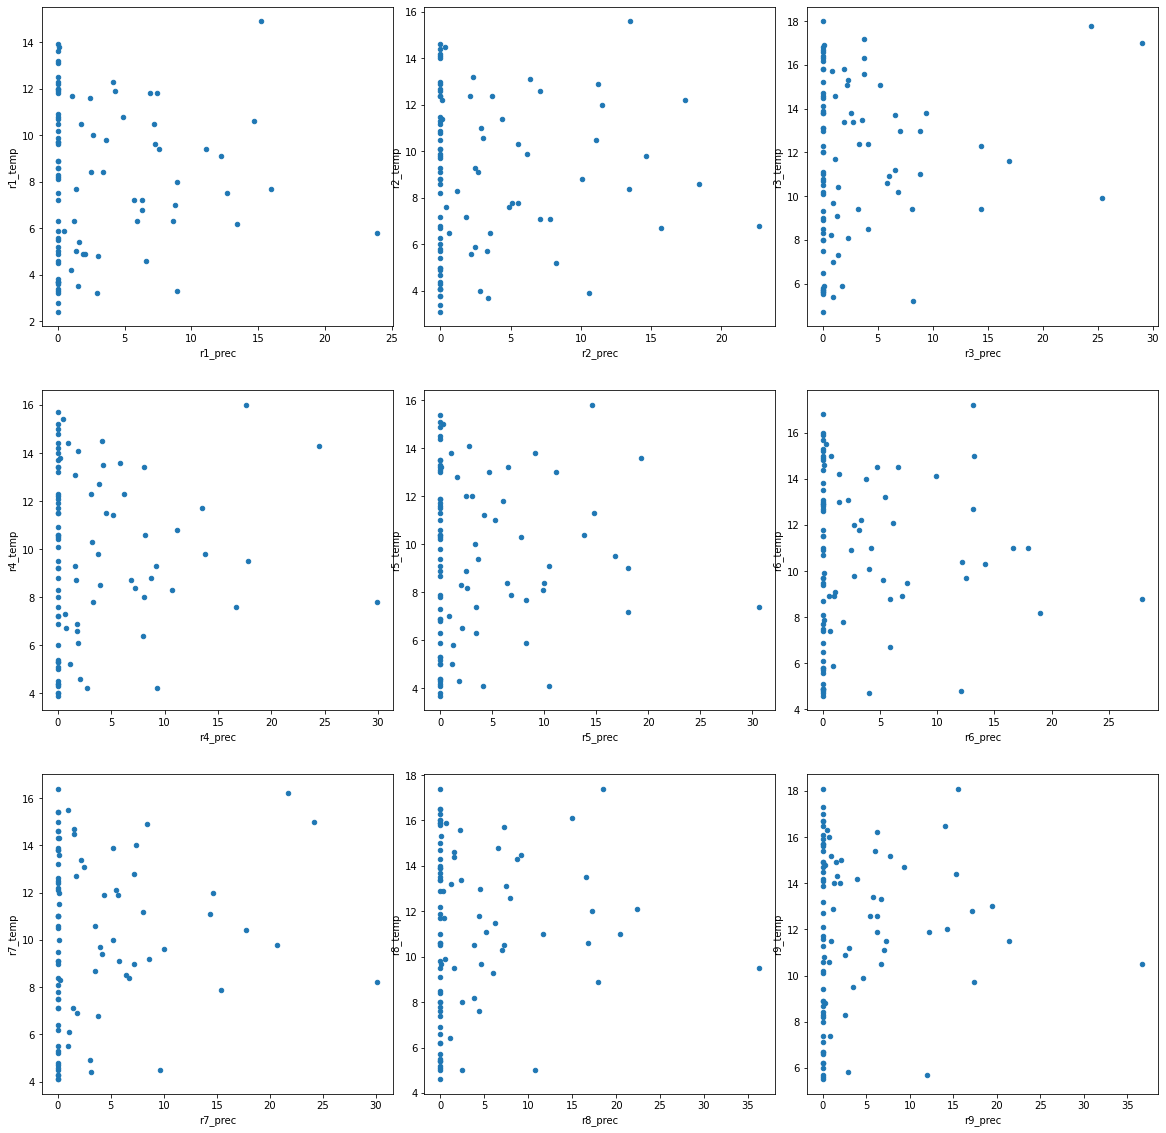

In [6]:
plot_seasonal_scatterplot(test, "Summer", 2000)

In [7]:
f = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]

test2 = f[['r1_prec', 'r1_temp']].to_numpy()
test2

array([[15.19999981, 14.89999962],
       [ 2.4000001 , 11.60000038],
       [ 0.        , 13.10000038],
       [ 0.        , 12.5       ],
       [14.69999981, 10.60000038],
       [ 0.        , 11.80000019],
       [ 7.30000019,  9.60000038],
       [ 1.20000005,  6.30000019],
       [ 1.60000002,  5.4000001 ],
       [ 0.        ,  5.9000001 ],
       [23.89999962,  5.80000019],
       [12.69999981,  7.5       ],
       [ 1.70000005, 10.5       ],
       [ 0.        ,  8.60000038],
       [ 2.5       ,  8.39999962],
       [ 0.        ,  9.89999962],
       [ 4.9000001 , 10.80000019],
       [ 0.        , 12.30000019],
       [ 7.4000001 , 11.80000019],
       [ 0.        , 10.89999962],
       [ 0.        , 12.        ],
       [ 0.        , 11.89999962],
       [ 0.        , 13.19999981],
       [ 0.1       , 13.80000019],
       [ 4.30000019, 11.89999962],
       [ 6.9000001 , 11.80000019],
       [12.19999981,  9.10000038],
       [ 3.4000001 ,  8.39999962],
       [ 0.        ,

In [8]:
from sklearn.metrics import pairwise_distances

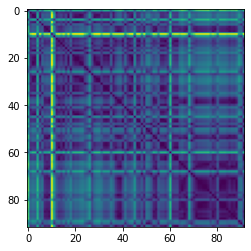

In [9]:
D = pairwise_distances(test2)
plt.imshow(D)
plt.show()

In [10]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

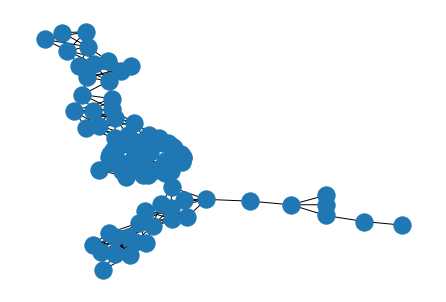

In [11]:
r = 1
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)

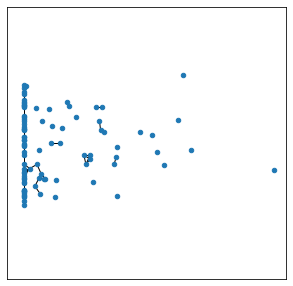

In [12]:
pos = {n:test2[n,:] for n in range(len(test2))}
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

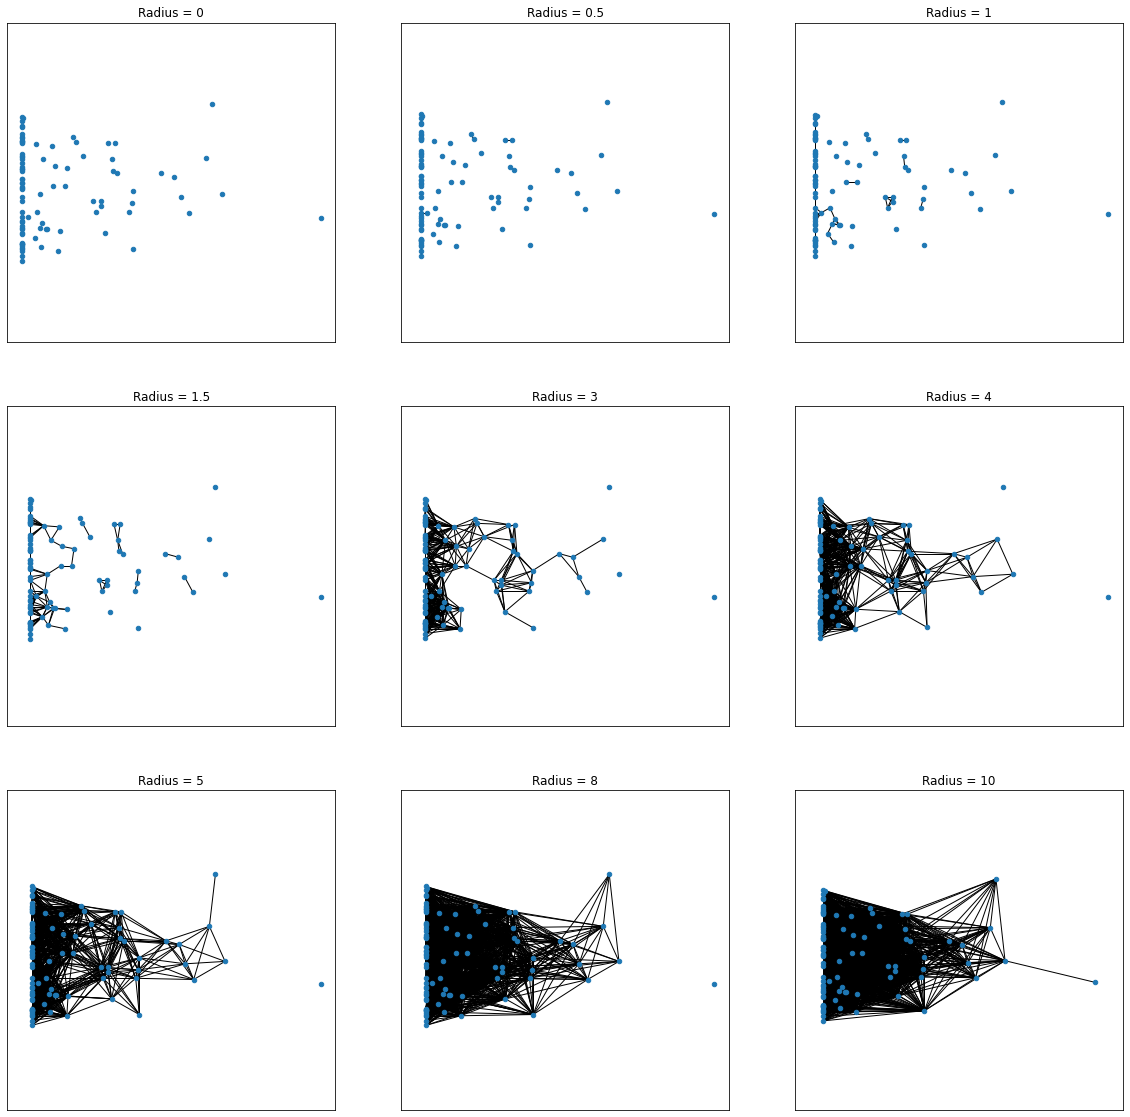

In [13]:
rs = [0,0.5,1,1.5,3,4,5,8,10]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

In [14]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [15]:
r = 1.5
G, two_spx_list = create_2_dim_simplicial_complex(D,r)

In [16]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

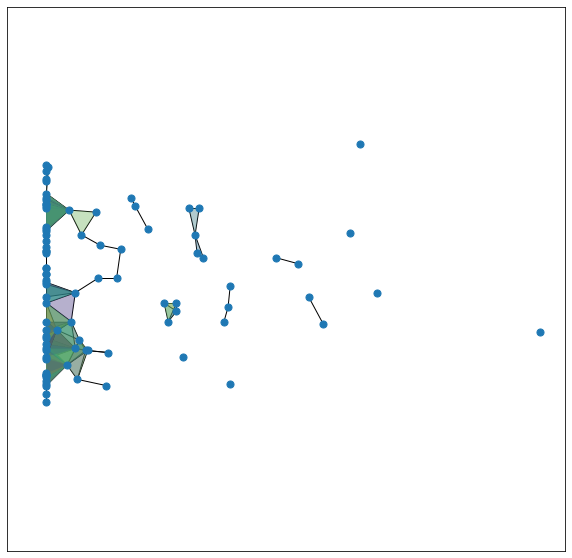

In [17]:
fig, ax = plt.subplots(figsize = (10,10))

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=.15)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

In [18]:
test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
test2

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
15516,2000-07-01,10.573948,14.9,15.6,17.799999,16.0,15.8,17.200001,16.200001,17.4,...,17.6,14.600000,13.1,21.700001,18.5,15.6,2000,7,1,Summer
15517,2000-07-02,11.452162,11.6,12.4,15.100000,13.1,12.8,14.200000,13.400000,14.6,...,1.6,1.600000,1.4,2.200000,1.5,0.9,2000,7,2,Summer
15518,2000-07-03,11.499495,13.1,14.1,16.400000,14.4,14.4,15.300000,14.600000,16.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,2000,7,3,Summer
15519,2000-07-04,11.308546,12.5,14.2,18.000000,15.7,15.4,16.799999,16.400000,17.4,...,0.0,0.000000,0.0,0.000000,0.0,0.0,2000,7,4,Summer
15520,2000-07-05,14.119976,10.6,12.2,17.000000,14.3,13.6,15.200000,15.000000,16.5,...,24.5,19.299999,0.0,24.200001,0.0,0.0,2000,7,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,2000-09-26,3.910194,5.2,5.4,5.600000,5.1,5.3,5.700000,4.800000,5.5,...,0.0,0.000000,0.0,0.000000,0.0,0.0,2000,9,26,Summer
15604,2000-09-27,6.290759,3.6,4.1,5.600000,4.4,4.3,4.900000,4.300000,5.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,2000,9,27,Summer
15605,2000-09-28,6.994857,3.3,3.9,5.200000,4.2,4.1,4.800000,4.500000,5.0,...,9.3,10.500000,12.1,9.600000,10.8,12.0,2000,9,28,Summer
15606,2000-09-29,7.071433,7.0,7.6,9.400000,8.3,8.1,8.800000,8.500000,9.3,...,10.7,9.900000,5.9,6.400000,6.0,4.6,2000,9,29,Summer


In [19]:
def simpComplexes(a, r):

    D = pairwise_distances(a)
    #plt.imshow(D)
    #plt.show()

    rs = [1,2, 2.5, 3, 3.5, 4, 5, 6]
    pos = {n:a[n,:] for n in range(len(a))}

    plt.figure(figsize = (20,20))

    for (j,r) in enumerate(rs):
        G = create_simplicial_complex(D,r)
        plt.subplot(3,3,j+1)
        nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
        plt.axis('equal')
        plt.title('Radius = '+str(r))
        
    plt.show()

    #plt.figure(figsize = (7,7))
    G = create_simplicial_complex(D,r)
    #nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    #plt.axis('equal')
    #plt.show()

    G, two_spx_list = create_2_dim_simplicial_complex(D,r)

    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)


    fig, ax = plt.subplots(figsize = (7,7))

    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)

    plt.axis('equal')
    plt.show()


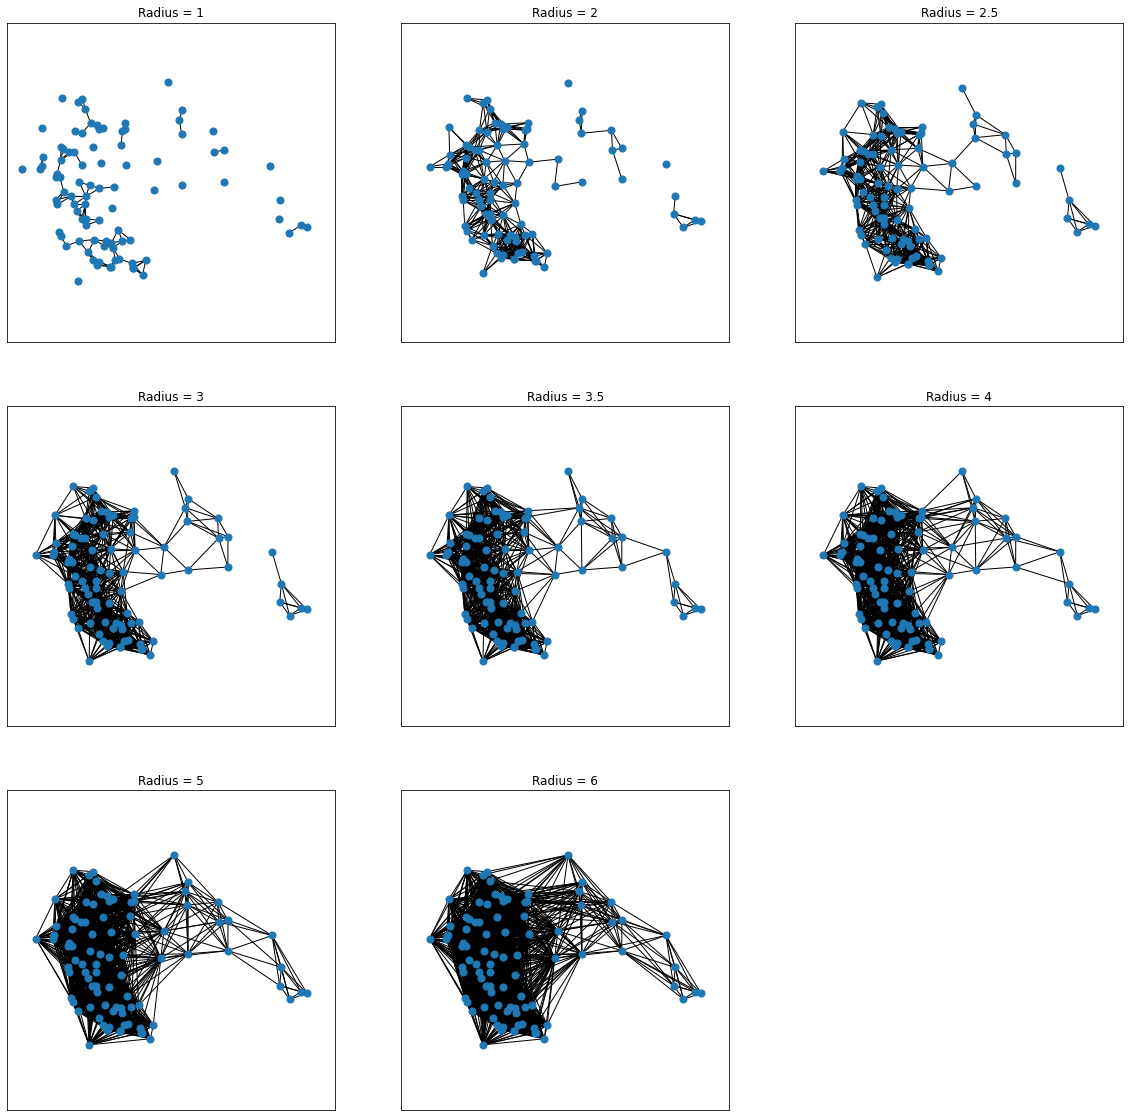

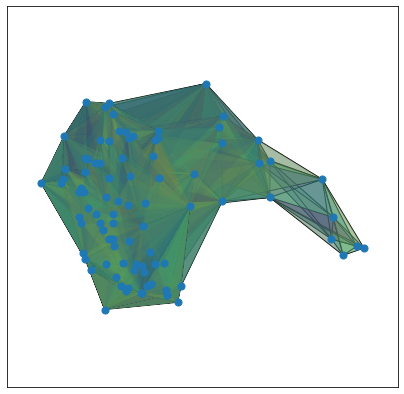

In [20]:
test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
test2 = test2[['flow', 'r1_temp']].to_numpy()

#test2 = test2

simpComplexes(test2, 4)

In [40]:
def lot_simplexes(data, conf):
    frame = test[(test["Season"] == 'Summer') & (test["Year"] == 2000)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]
    #flow = ['flow']

    #fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    #fig.subplots_adjust(hspace = .2, wspace=.09)
    #axs = axs.ravel()


    for i in range(2):
        if i == 9:
            break
        else:
            flow = 'flow'
            if conf == 'temp':
                print('here')
                conff = temp[i]
            else:
                conff = prec[i]
            test2 = frame[[flow, conff]].to_numpy()
            simpComplexes(test2, 4)
            #frame.groupby(frame["Month"]).plot.scatter(flow, temp[i], ax = axs[i])

    #plt.show()

    #test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
    #test2 = test2[['flow', 'r1_temp']].to_numpy()

    #test2 = test2

    #simpComplexes(test2, 4)

here


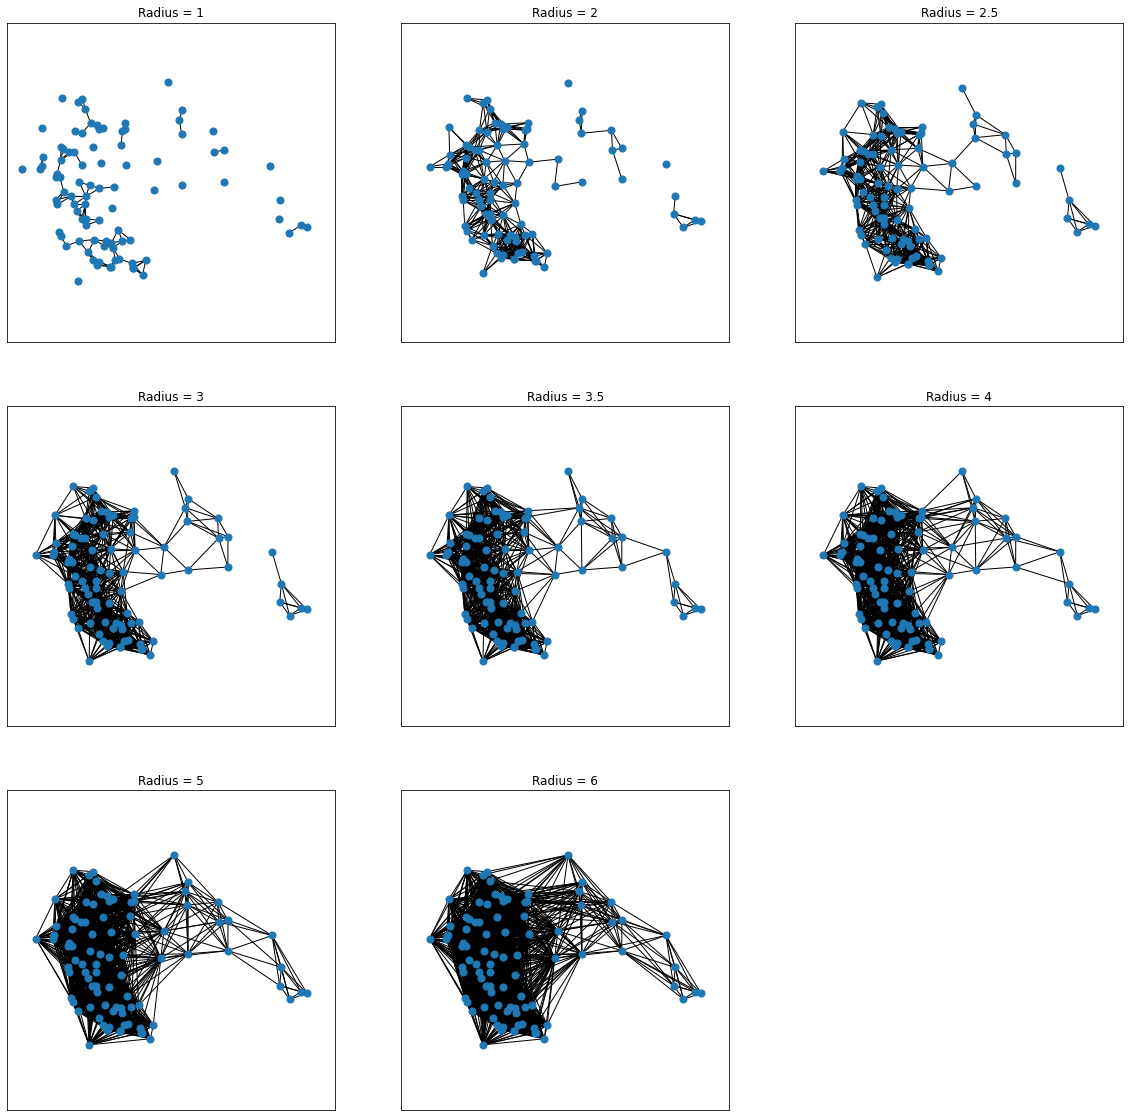

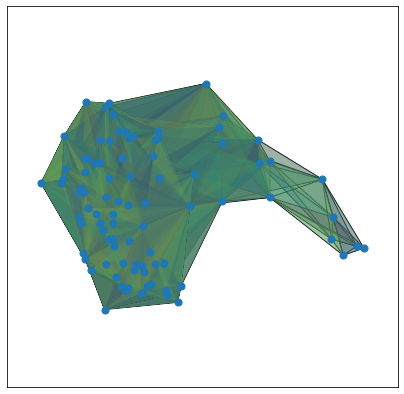

here


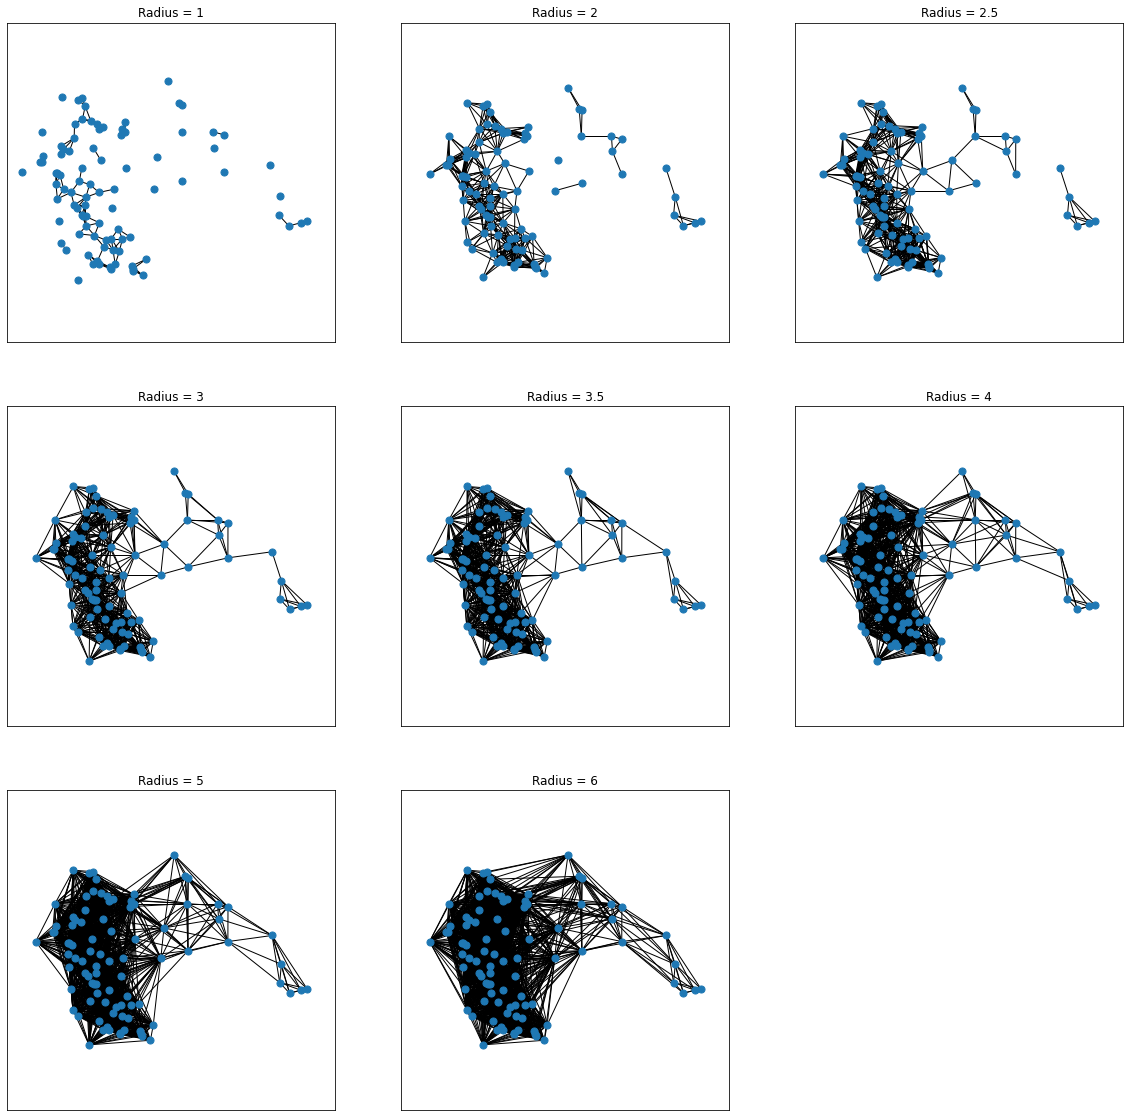

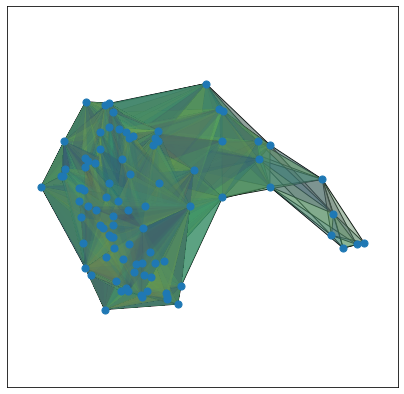

In [41]:
lot_simplexes(test, 'temp')

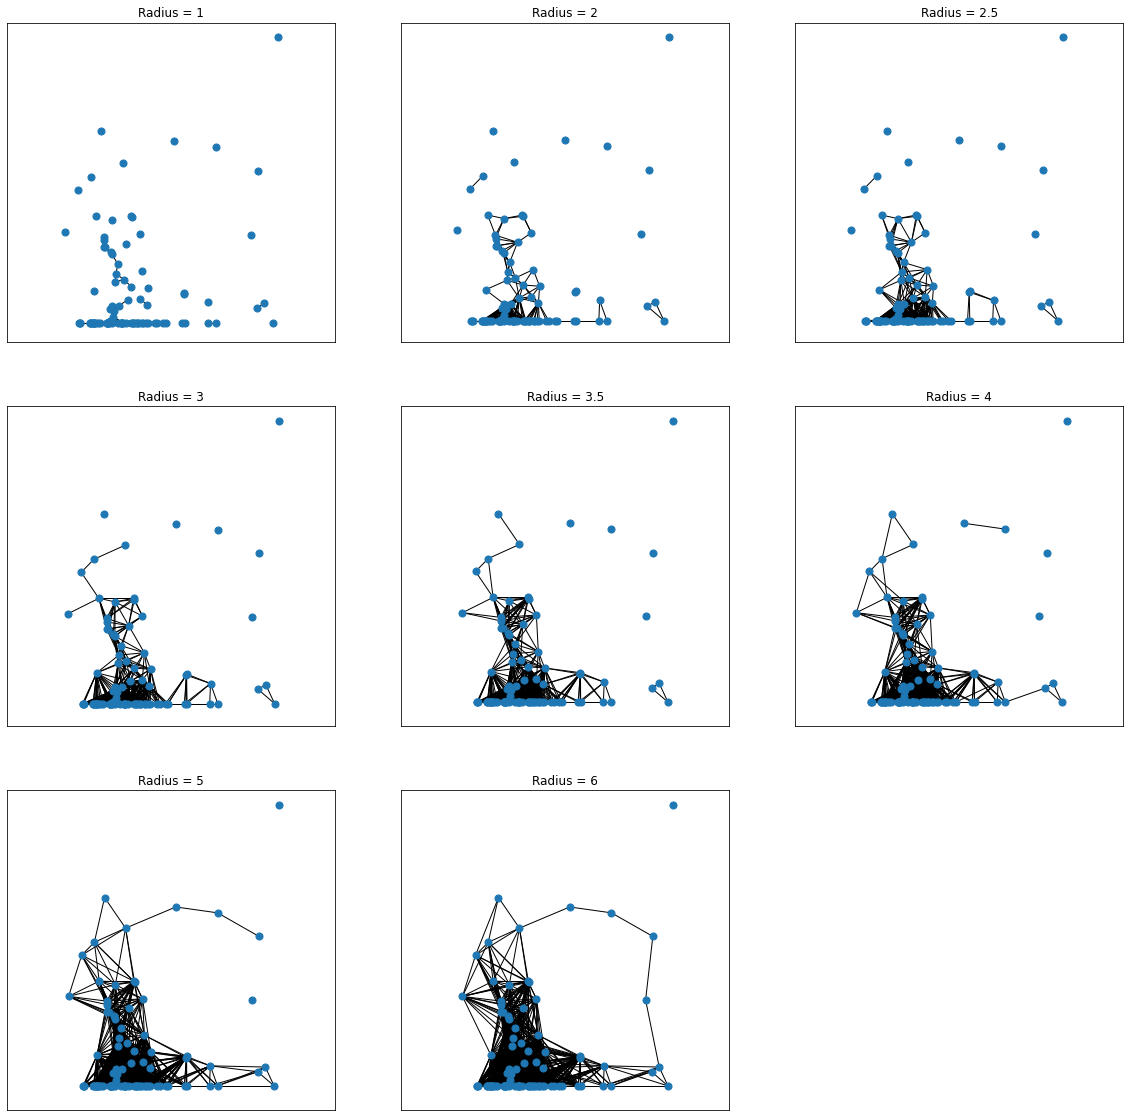

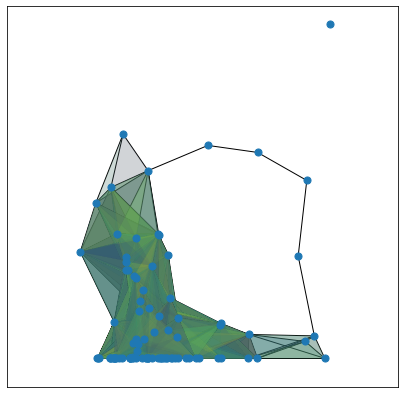

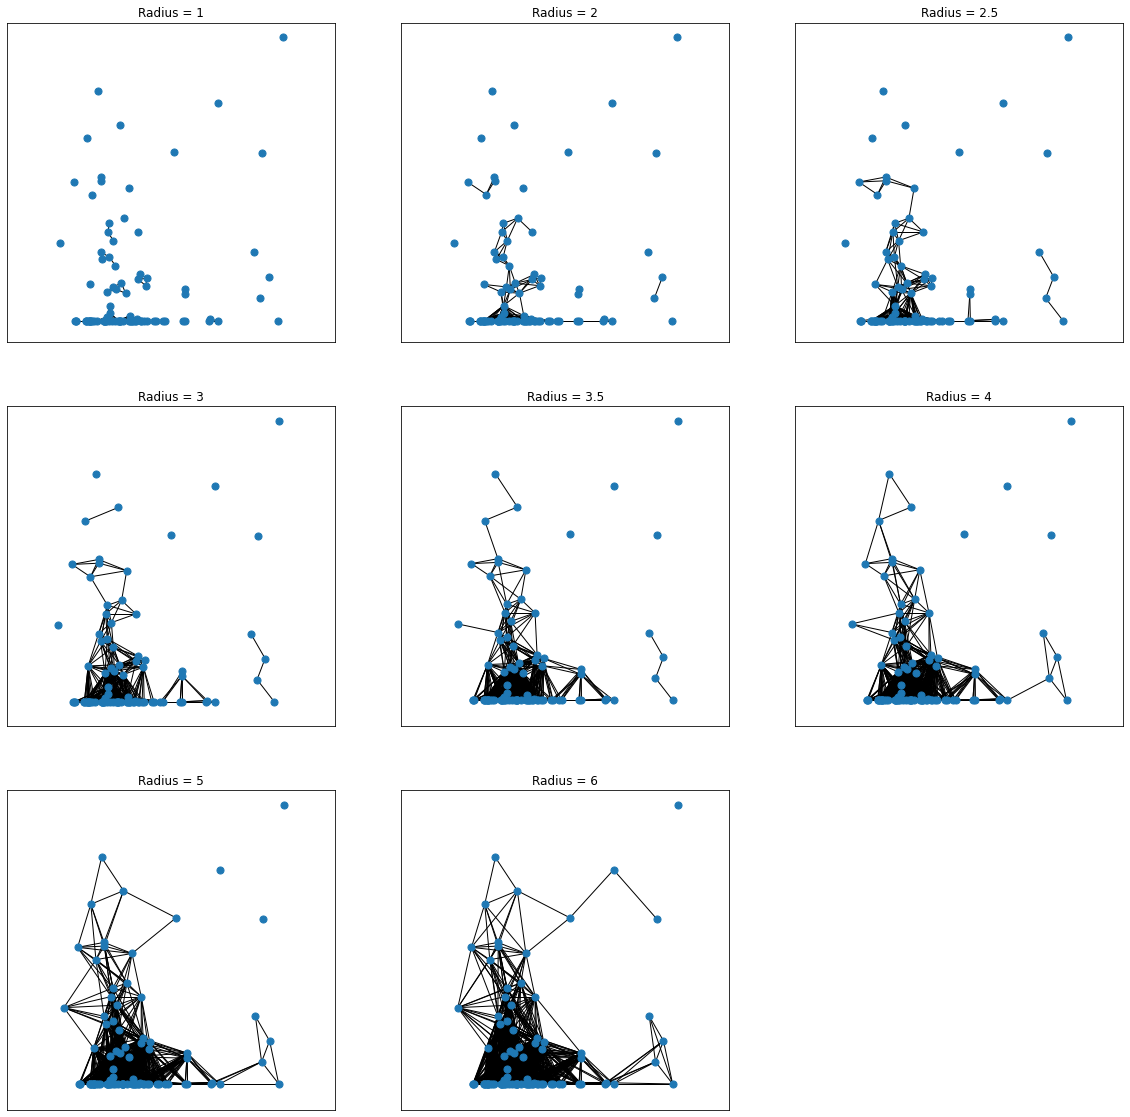

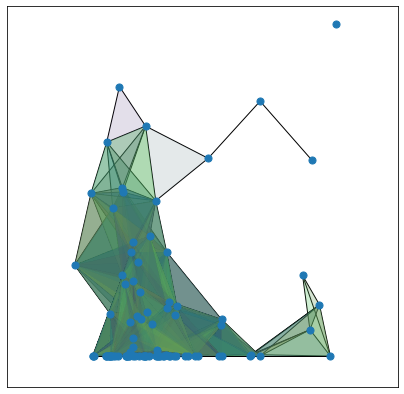

In [23]:
lot_simplexes(test, 'prec')

## Diagramas de persistencia y Barcodes

In [64]:
import gudhi as gd

In [65]:
frame = test[(test["Season"] == 'Summer') & (test["Year"] == 2000)]
test2 = frame[['flow', 'r1_prec']]

In [66]:
D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)

In [67]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)

Number of Simplices: 2924013


In [68]:
BarCodes = Rips_complex.persistence()

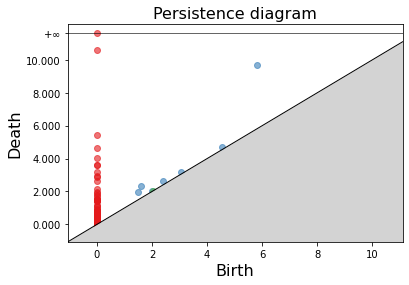

In [69]:
gd.plot_persistence_diagram(BarCodes)
plt.show()
#Rojo = vertices; azul = huecos. CUando mueren y nacen

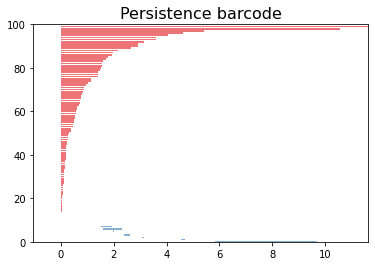

In [70]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')